Nowadays companies want to understand, what went wrong with their latest products? What users and the general public think about the latest feature? You can quantify such information with reasonable accuracy using sentiment analysis.

Quantifying users content, idea, belief, and opinion is known as sentiment analysis. User's online post, blogs, tweets, feedback of product helps business people to the target audience and innovate in products and services. Sentiment analysis helps in understanding people in a better and more accurate way. It is not only limited to marketing, but it can also be utilized in politics, research, and security.

There are mainly two approaches for performing sentiment analysis.

Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.

Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral.

In this execrsice, you will use the first approach(Machine learning based approach). This is how you learn sentiment and text classification with a single example.

Download all the packages from NLTK.

In [1]:
import nltk
#nltk.download('punkt')
import pandas as pd

We have extracted review comment from amazon for on the product. This is Digital Thermostat Control Unit - A419ABG-3C. We have written these review comment in and CSV file named 'AmazonComments.csv'. We can now start preprocess these reviews for text analytics and sentiment anlaysis.

In [2]:
#read reviews from csv
path='FILEPATH\\AmazonComments.csv'
review = pd.read_csv(path,encoding="ISO-8859-1")
review.columns=['Review Number','Review']
review.head()

,Review Number,Review
0,1,I am using this controller for Sous Vide Cooki...
1,2,I use this to keep my beer nice and cold insid...
2,3,I purchased this control as an alternative to ...
3,4,This unit worked great while it lasted--all 5 ...
4,5,I've been using the Johnson controller for yea...


In [3]:
#remove observation column
review.drop(["Review Number"], axis = 1, inplace = True) 
review.head()

,Review
0,I am using this controller for Sous Vide Cooki...
1,I use this to keep my beer nice and cold insid...
2,I purchased this control as an alternative to ...
3,This unit worked great while it lasted--all 5 ...
4,I've been using the Johnson controller for yea...


Import NLTK packages to perform analysis of the review dataframe. i.e review['Review']

In [16]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import tokenize

In [21]:
#join all the review in one big text which can be tokenized by sentences later.
AllReview_text = " ".join(review for review in review['Review'])
print(AllReview_text)

I am using this controller for Sous Vide Cooking & I love it.  It has proven to do the job very well.  I protect the temperature probe from the water by using a length of 3/8" soft copper tubing which is pinched and soldered shut on the bottom end.  That allows the probe to sense the temperature without a lag.This unit has allowed me to experience Sous Vide cooking at a low cost because I use it in conjunction with an ordinary 7 quart crock pot.  I gave it four stars only because the instructions are not user friendly.  To help others I have posted photos of the interior mechanism on whysousvide.com.  The photos clearly show where the jumpers are and how to move one of them to use it to control a heating unit rather than a refrigerator.  It's quite simple once you know how.  I also like the long wires as they allow plenty of room to move things around on the counter top.I highly recommend it. I use this to keep my beer nice and cold inside of a chest freezer. This thing works like a ch

Since the word tokenization also tokenize punctuations. May want to remove those first, maybe also remove numbers. Below will remove everything other than text from the each row. replace('[^A-z ]',' ') replaces anything string other than alphabet with space.

In [6]:
#using regular expression removing punctuation and numbers from each of the review comments.
review['Review_only_text']=review['Review'].str.replace('[^A-z ]',' ').str.replace(' +',' ').str.strip()

In [7]:
#view 1st comments after cleaining text
review['Review_only_text'][1]

'I use this to keep my beer nice and cold inside of a chest freezer This thing works like a charm I initially had it simply sitting in the freezer but I soon realized that the beer was warmer that I needed it to be I figured out that measuring the air temperature was not the way to go I wrapped the temperature probe in plastic and submerged it in a bottle of water so that it actually uses the temperature of the liquid instead of the internal air temperature This allows me to regulate the temperature of the freezer by how cold the liquid is not how cold the air is The way that it controls the temperature is by allowing the unit to switch on when it rises above the desired temperature and completely cutting off the electricity when it reaches or falls below the set temperature Keep this in mind as any lights associated with fridges or freezers will only work when the unit allows power to go to your device'

Lets create one string with all the review comments from data frame review['Review']. This text can then be processed to remove stopwords and create word cloud.

In [9]:
text = " ".join(review for review in review['Review_only_text'])
type(text)
#str
text.lower()
text

'I am using this controller for Sous Vide Cooking I love it It has proven to do the job very well I protect the temperature probe from the water by using a length of soft copper tubing which is pinched and soldered shut on the bottom end That allows the probe to sense the temperature without a lag This unit has allowed me to experience Sous Vide cooking at a low cost because I use it in conjunction with an ordinary quart crock pot I gave it four stars only because the instructions are not user friendly To help others I have posted photos of the interior mechanism on whysousvide com The photos clearly show where the jumpers are and how to move one of them to use it to control a heating unit rather than a refrigerator It s quite simple once you know how I also like the long wires as they allow plenty of room to move things around on the counter top I highly recommend it I use this to keep my beer nice and cold inside of a chest freezer This thing works like a charm I initially had it sim

Now, use Word tokenizer to get list of each words seperated by spaces.

In [18]:
#review['tokenized_sents'] = review['Review'].apply(lambda row: word_tokenize(row))
tokenized_word=tokenize.word_tokenize(text)
print(tokenized_word)

['I', 'am', 'using', 'this', 'controller', 'for', 'Sous', 'Vide', 'Cooking', 'I', 'love', 'it', 'It', 'has', 'proven', 'to', 'do', 'the', 'job', 'very', 'well', 'I', 'protect', 'the', 'temperature', 'probe', 'from', 'the', 'water', 'by', 'using', 'a', 'length', 'of', 'soft', 'copper', 'tubing', 'which', 'is', 'pinched', 'and', 'soldered', 'shut', 'on', 'the', 'bottom', 'end', 'That', 'allows', 'the', 'probe', 'to', 'sense', 'the', 'temperature', 'without', 'a', 'lag', 'This', 'unit', 'has', 'allowed', 'me', 'to', 'experience', 'Sous', 'Vide', 'cooking', 'at', 'a', 'low', 'cost', 'because', 'I', 'use', 'it', 'in', 'conjunction', 'with', 'an', 'ordinary', 'quart', 'crock', 'pot', 'I', 'gave', 'it', 'four', 'stars', 'only', 'because', 'the', 'instructions', 'are', 'not', 'user', 'friendly', 'To', 'help', 'others', 'I', 'have', 'posted', 'photos', 'of', 'the', 'interior', 'mechanism', 'on', 'whysousvide', 'com', 'The', 'photos', 'clearly', 'show', 'where', 'the', 'jumpers', 'are', 'and', '

In [22]:
#use AllReview_text to tokenize by sentences for sentiment analysis using VADER.
tokenized_sent=tokenize.sent_tokenize(AllReview_text)
print(tokenized_sent)

['I am using this controller for Sous Vide Cooking & I love it.', 'It has proven to do the job very well.', 'I protect the temperature probe from the water by using a length of 3/8" soft copper tubing which is pinched and soldered shut on the bottom end.', 'That allows the probe to sense the temperature without a lag.This unit has allowed me to experience Sous Vide cooking at a low cost because I use it in conjunction with an ordinary 7 quart crock pot.', 'I gave it four stars only because the instructions are not user friendly.', 'To help others I have posted photos of the interior mechanism on whysousvide.com.', 'The photos clearly show where the jumpers are and how to move one of them to use it to control a heating unit rather than a refrigerator.', "It's quite simple once you know how.", 'I also like the long wires as they allow plenty of room to move things around on the counter top.I highly recommend it.', 'I use this to keep my beer nice and cold inside of a chest freezer.', 'Th

In [82]:
type(tokenized_word)

list

Let's get rid of stop words.

In [76]:
stop_words = set(stopwords.words('english')) 
# from the above tokens we lot of references of words like "I","Temperature","temp","Controller","thermostat". 
#Since these reviews are realted to thermostat we can remove these word to analyse actual experience of customer.

stop_words.update(["I","temperature","temp","controller","thermostat","The"])

#tokenized_word_without_Stopwords = [w for w in tokenized_word if not w in stop_words] 
  
tokenized_word_without_Stopwords = [] 
  
for w in tokenized_word: 
    if w not in stop_words: 
        tokenized_word_without_Stopwords.append(w) 
  
print(tokenized_word_without_Stopwords) 

# tokenized_word_without_Stopwords = map(lambda w : w if not w in stop_words, tokenized_word)
# print(tokenized_word_without_Stopwords)

['using', 'Sous', 'Vide', 'Cooking', 'love', 'It', 'proven', 'job', 'well', 'protect', 'probe', 'water', 'using', 'length', 'soft', 'copper', 'tubing', 'pinched', 'soldered', 'shut', 'bottom', 'end', 'That', 'allows', 'probe', 'sense', 'without', 'lag', 'This', 'unit', 'allowed', 'experience', 'Sous', 'Vide', 'cooking', 'low', 'cost', 'use', 'conjunction', 'ordinary', 'quart', 'crock', 'pot', 'gave', 'four', 'stars', 'instructions', 'user', 'friendly', 'To', 'help', 'others', 'posted', 'photos', 'interior', 'mechanism', 'whysousvide', 'com', 'photos', 'clearly', 'show', 'jumpers', 'move', 'one', 'use', 'control', 'heating', 'unit', 'rather', 'refrigerator', 'It', 'quite', 'simple', 'know', 'also', 'like', 'long', 'wires', 'allow', 'plenty', 'room', 'move', 'things', 'around', 'counter', 'top', 'highly', 'recommend', 'use', 'keep', 'beer', 'nice', 'cold', 'inside', 'chest', 'freezer', 'This', 'thing', 'works', 'like', 'charm', 'initially', 'simply', 'sitting', 'freezer', 'soon', 'realiz

In [84]:
print ("There are {} words in all of the review comments.".format(len(tokenized_word_without_Stopwords)))

There are 15922 words in all of the review comments.


# Frequency Distribution

In [80]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
%matplotlib inline

<FreqDist with 3252 samples and 14920 outcomes>


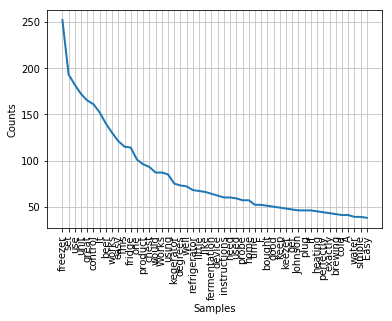

<Figure size 3600x3600 with 0 Axes>

In [81]:
# Frequency Distribution Plot
fdist = FreqDist(tokenized_word_without_Stopwords)
print(fdist)
fdist.plot(50,cumulative=False) #plot 50 high frequency words
plt.figure(figsize=(50,50))
plt.show()

# POS tagging (Parts of Speech)

In [38]:
import nltk
#nltk.download('averaged_perceptron_tagger')

In [116]:
tagged = nltk.pos_tag(tokenized_word_without_Stopwords) #need to use split()
tagged[0:20]

[('using', 'VBG'),
 ('Sous', 'NNP'),
 ('Vide', 'NNP'),
 ('Cooking', 'NNP'),
 ('love', 'VB'),
 ('It', 'PRP'),
 ('proven', 'JJ'),
 ('job', 'NN'),
 ('well', 'RB'),
 ('protect', 'JJ'),
 ('probe', 'NN'),
 ('water', 'NN'),
 ('using', 'VBG'),
 ('length', 'NN'),
 ('soft', 'JJ'),
 ('copper', 'NN'),
 ('tubing', 'VBG'),
 ('pinched', 'VBN'),
 ('soldered', 'JJ'),
 ('shut', 'NN')]

Some examples are as below:

Abbreviation	Meaning
CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective (large)
JJR	adjective, comparative (larger)
JJS	adjective, superlative (largest)
LS	list market
MD	modal (could, will)
NN	noun, singular (cat, tree)
NNS	noun plural (desks)
NNP	proper noun, singular (sarah)
NNPS	proper noun, plural (indians or americans)
PDT	predeterminer (all, both, half)
POS	possessive ending (parent\ 's)
PRP	personal pronoun (hers, herself, him,himself)
PRP$	possessive pronoun (her, his, mine, my, our )
RB	adverb (occasionally, swiftly)
RBR	adverb, comparative (greater)
RBS	adverb, superlative (biggest)
RP	particle (about)
TO	infinite marker (to)
UH	interjection (goodbye)
VB	verb (ask)
VBG	verb gerund (judging)
VBD	verb past tense (pleaded)
VBN	verb past participle (reunified)
VBP	verb, present tense not 3rd person singular(wrap)
VBZ	verb, present tense with 3rd person singular (bases)
WDT	wh-determiner (that, what)
WP	wh- pronoun (who)
WRB	wh- adverb (how)

POS tagger is used to assign grammatical information of each word of the sentence.

# Create word cloud

In [72]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [113]:
#Convert tokenized list of words to string to be passed to WordCloud.generate() method
text=' '.join(tokenized_word_without_Stopwords)
type(text)
#str
print (text)

using Sous Vide Cooking love It proven job well protect probe water using length soft copper tubing pinched soldered shut bottom end That allows probe sense without lag This unit allowed experience Sous Vide cooking low cost use conjunction ordinary quart crock pot gave four stars instructions user friendly To help others posted photos interior mechanism whysousvide com photos clearly show jumpers move one use control heating unit rather refrigerator It quite simple know also like long wires allow plenty room move things around counter top highly recommend use keep beer nice cold inside chest freezer This thing works like charm initially simply sitting freezer soon realized beer warmer needed figured measuring air way go wrapped probe plastic submerged bottle water actually uses liquid instead internal air This allows regulate freezer cold liquid cold air way controls allowing unit switch rises desired completely cutting electricity reaches falls set Keep mind lights associated fridges

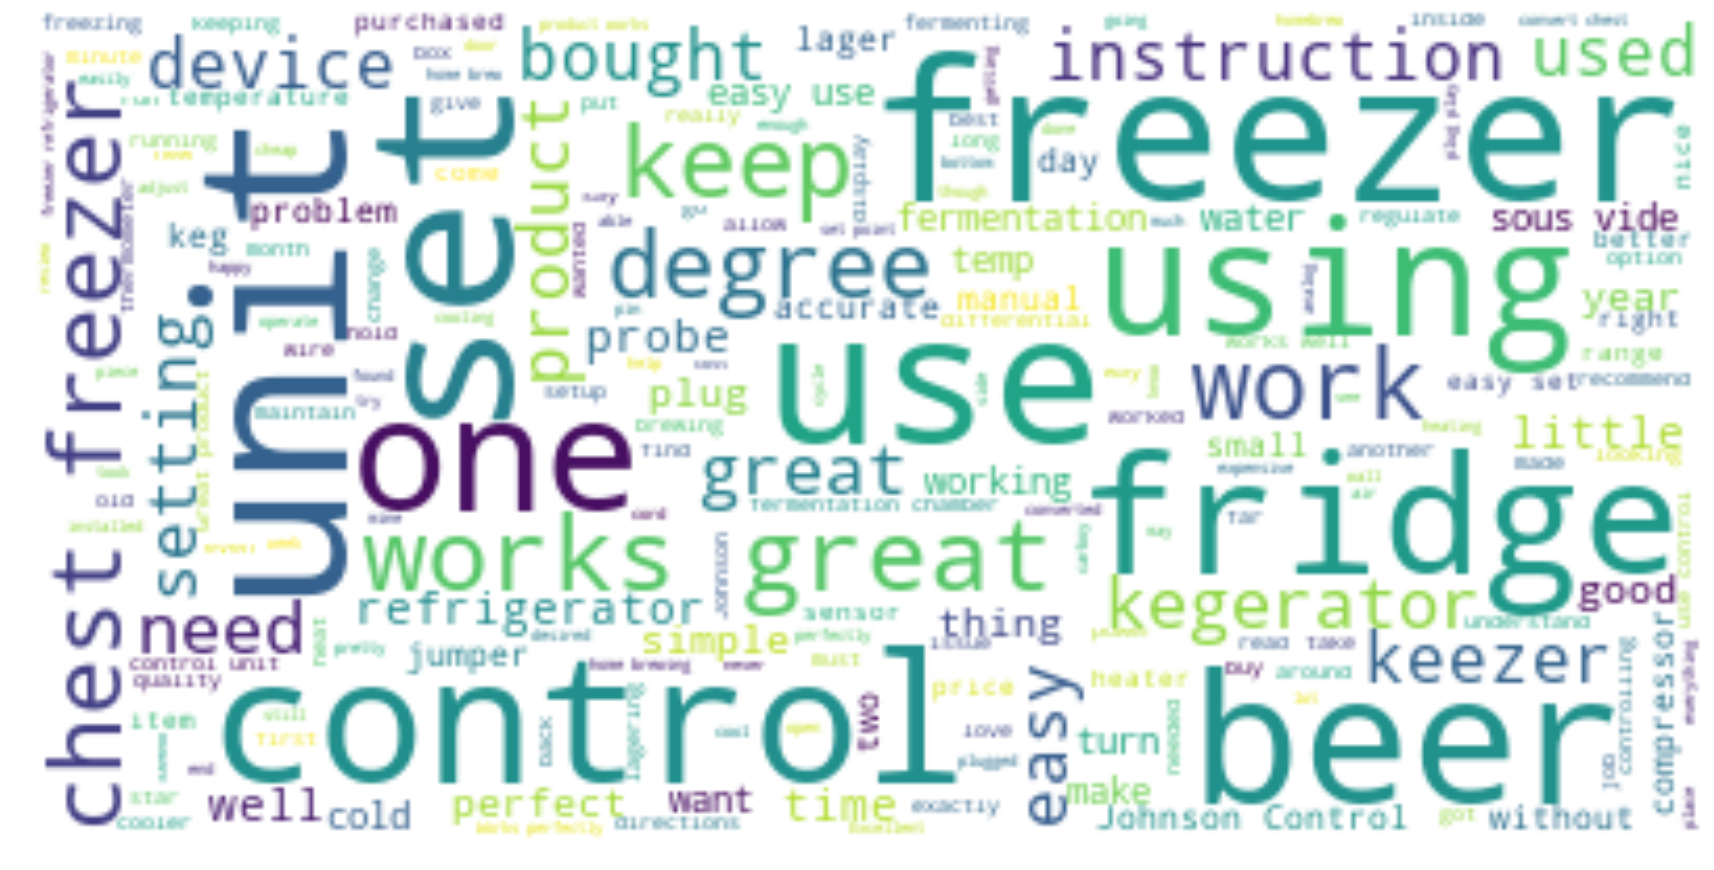

In [114]:
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(30,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("C:/Users/jkadhak/Python Scripts/wordcloud.png")

From the word cloud we infer:
1. This Thermostat might be widely used for freezing beers.
2. There are lot of positive words like "great", "simple", "great" ,"easy", "better", "best"
Since we words like "works", "working" ,"worked" and "work", which essentially mean "work"

# VADER Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.

VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

It is fully open-sourced under the MIT License. The developers of VADER have used Amazon’s Mechanical Turk to get most of their ratings.

Advantages of using VADER:

VADER has a lot of advantages over traditional methods of Sentiment Analysis, including:

It works exceedingly well on social media type text, yet readily generalizes to multiple domains
It doesn’t require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon
It is fast enough to be used online with streaming data, and
It does not severely suffer from a speed-performance tradeoff.
The source of this article is a very easy to read paper published by the creaters of VADER library.

In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Use tokenised sentences to check the sentiment weights associated with each tokenized sentence in reviews.

In [52]:
sid = SentimentIntensityAnalyzer()
for sentence in tokenized_sent:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print('\n')

I am using this controller for Sous Vide Cooking & I love it.
compound: 0.6369, neg: 0.0, neu: 0.682, pos: 0.318, 

It has proven to do the job very well.
compound: 0.3384, neg: 0.0, neu: 0.77, pos: 0.23, 

I protect the temperature probe from the water by using a length of 3/8" soft copper tubing which is pinched and soldered shut on the bottom end.
compound: 0.3818, neg: 0.0, neu: 0.902, pos: 0.098, 

That allows the probe to sense the temperature without a lag.This unit has allowed me to experience Sous Vide cooking at a low cost because I use it in conjunction with an ordinary 7 quart crock pot.
compound: -0.2732, neg: 0.062, neu: 0.938, pos: 0.0, 

I gave it four stars only because the instructions are not user friendly.
compound: -0.3875, neg: 0.193, neu: 0.807, pos: 0.0, 

To help others I have posted photos of the interior mechanism on whysousvide.com.
compound: 0.4019, neg: 0.0, neu: 0.803, pos: 0.197, 

The photos clearly show where the jumpers are and how to move one of them

compound: -0.25, neg: 0.198, neu: 0.685, pos: 0.117, 

For beer making, refrigeration, environmental control, if it needs precise control of temp to the degree and you have the proper equipement, this puppy will run it like the best dream you ever had.
compound: 0.8271, neg: 0.0, neu: 0.781, pos: 0.219, 

If I could give it 6 stars I would.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Overall, I'm satisfied with this product.
compound: 0.4215, neg: 0.0, neu: 0.641, pos: 0.359, 

It works well, has excellent fit and finish, and performs as expected.
compound: 0.8074, neg: 0.0, neu: 0.52, pos: 0.48, 

There's a little bit of a learning curve, so you'll need to read the instructions that come with it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Also, the temperature sensor doesn't seem to read what thermometers measure, even when positioned directly next to them.I use it for stabilizing the temperature of fermenting homebrew.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Mostly, it'

compound: 0.34, neg: 0.0, neu: 0.676, pos: 0.324, 

Ended up freezing some water in the bottom and freezing the CO2 gauge when the probe was too high up.
compound: -0.2023, neg: 0.135, neu: 0.865, pos: 0.0, 

Other than that it works well for the application that I need.
compound: 0.2732, neg: 0.0, neu: 0.826, pos: 0.174, 

If you are reading this, you are most likely a beer drinker looking to convert a chest freezer into a keg freezer (keezer) draft beer dispenser.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Well, I'm here to tell you that everything you read out there on the interweb that led you to this item is true.
compound: 0.5994, neg: 0.0, neu: 0.811, pos: 0.189, 

Once you get it set up properly, you will always have a well chilled beer at hand.
compound: 0.6486, neg: 0.0, neu: 0.725, pos: 0.275, 

And for anyone else who might happen to be looking to use this item for what it was intended for...
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

I can tell you that it keeps my


It was easy to install although the directions for setting the temperatures are very confusing.
compound: 0.1796, neg: 0.121, neu: 0.719, pos: 0.16, 

Once set, it works just fine.
compound: 0.2023, neg: 0.0, neu: 0.735, pos: 0.265, 

I use the thermostat to control the temperature in a chest freezer that I use for fermenting beer (35-55 F).
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

The controller works great for this purpose.
compound: 0.6249, neg: 0.0, neu: 0.594, pos: 0.406, 

I also have a second one that I plan on using to operate a HERMS device for my mashing system.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

You can set the controller to operate a heater or cooling device but you must reposition "jumpers" inside the unit (not difficult but a pain if you plan on doing it often).
compound: -0.8271, neg: 0.216, neu: 0.784, pos: 0.0, 

If you want a unit that switches automatically betweem cooling and heating, you are better off with the more expensive Ranco controller.Thi

compound: 0.3612, neg: 0.0, neu: 0.828, pos: 0.172, 

Nice reliable product.
compound: 0.4215, neg: 0.0, neu: 0.417, pos: 0.583, 

I currently use it on an old wine fridge as a homebrew fermentation chamber.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

It had a bad thermostat and I already had this controller.
compound: -0.5423, neg: 0.304, neu: 0.696, pos: 0.0, 

Holds the perfect temp, especially brewing in the summer.
compound: 0.5719, neg: 0.0, neu: 0.684, pos: 0.316, 

Wow so far so good.
compound: 0.8347, neg: 0.0, neu: 0.276, pos: 0.724, 

This thing is accurate to ~1 degree or so.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

You can set the difference of the set point you to when the heater comes on to whatever interval you want.
compound: 0.0772, neg: 0.0, neu: 0.939, pos: 0.061, 

I am using this for an aquarium with a finnex th heater.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

I was having wide temperature swings with my kegerator, making it impossible to control fo

The problem was, with my crockpot, the controller would shut off right at 130 degrees (for steak at medium rare) but the temperature would climb up to 134F before reversing course and falling back down.
compound: -0.4118, neg: 0.102, neu: 0.898, pos: 0.0, 

I contribute that to the design of the crockpot (where the heating element is outside of the thick porcelain), and so the product does exactly what its supposed to do but theres a 4 degree swing with my setup.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Considering the Sous Vide Supreme says itll keep the water within a half a degree F of the set temp, 4 degree swing was too much for me.
compound: 0.5574, neg: 0.0, neu: 0.865, pos: 0.135, 

I ended up setting the temp at 126 (to allow it to reach a max temp of 130.
compound: 0.25, neg: 0.0, neu: 0.824, pos: 0.176, 

)So if A, you have a different heating element to keep the temp swings down or B, dont mind 4 degree temp swings, this might work great for you.
compound: 0.6249,

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

If you need a controlled temp this will likely do it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

EXCELENT FOR BREWING FRIDGE WORKS GREAT Price and performance unbeatable.
compound: 0.7034, neg: 0.0, neu: 0.651, pos: 0.349, 

I shopped around and got this at close to analog price.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Only other option was building my own If you're a homebrewer like me but not the most handy when it comes to wiring like some other controllers... this is the one for you!
compound: 0.6476, neg: 0.0, neu: 0.85, pos: 0.15, 

Very easy to use, instructions make programming a breeze.
compound: 0.4927, neg: 0.0, neu: 0.687, pos: 0.313, 

Have used for lager fermentation as well as for dispensing homebrew on draft!
compound: 0.3382, neg: 0.0, neu: 0.834, pos: 0.166, 

Temp is spot on.It's a little on the expensive side, but it is an excellent product!
compound: 0.7463, neg: 0.0, neu: 0.724, pos: 0.276, 

I bought this 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

I would highly recommend for this purpose.
compound: 0.4201, neg: 0.0, neu: 0.642, pos: 0.358, 

What's to say!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Since I'm already using one for my keezer, I already knew what to expect.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

I believe these are rated for 12 amps.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

The commercial refer that I acquired draws roughly 10.5 amps.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

So this may be an inexpensive experiment.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

The item was the controller, it was the less expensive alternative.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Will not buy from that vendor again.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Rugged yet small enough to be mounted on a micro fridge.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Keeps my kegerator at a steady 37 degrees without overburdening the compressor.
compou

compound: 0.6249, neg: 0.0, neu: 0.745, pos: 0.255, 

It was a little hard to figure out the programming but it does it's job.
compound: -0.0138, neg: 0.075, neu: 0.925, pos: 0.0, 

one for fermentation and one for your keezer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

this thing rocks and this was the lowest price on the net.
compound: -0.3818, neg: 0.191, neu: 0.809, pos: 0.0, 

I bought this controller to convert my chest freezer to a keezer for my kegged home brewed beer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

It was easy to understand the instructions and program for the ideal temperature I needed for an optimum pore!
compound: 0.7644, neg: 0.0, neu: 0.708, pos: 0.292, 

I plan to order another in the future to control my fermentation chamber .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

best I've found for the money HAVE ONLY HAD THE ITEM FOR A FEW WEEKS, BUT IT WORKS WELL AS DESCRIBED.
compound: 0.7468, neg: 0.0, neu: 0.739, pos: 0.261, 

Works.
compound: 0.0, ne

compound: -0.7366, neg: 0.256, neu: 0.744, pos: 0.0, 

it did not come with a manual, but for a complete set of instructions go to Johnsons web site.[...]
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Installed this device on a commercial 2 door freezer  to convert it to a refrigerator.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Easy to install and works great Attached it to an upright freezer and it makes a great kegerator!
compound: 0.908, neg: 0.0, neu: 0.551, pos: 0.449, 

This is the second of these units I have purchased to create a couple of kegerators Used to larger home brew with a small dorm style refrigerator works  as advertized  easy to use.
compound: 0.6124, neg: 0.0, neu: 0.848, pos: 0.152, 

Can 't Waite to try my first larger.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Using for a home brew keezer and works great!!
compound: 0.6892, neg: 0.0, neu: 0.599, pos: 0.401, 

Just started using a few weeks ago, but at this point, definitely recommend!
compound: 0.7959

Easy and straight forward once you read.I'm off to buy another one as a gift for a friend with a non-digital crock pot like mine that wants to try sous vide cooking.
compound: 0.9081, neg: 0.0, neu: 0.642, pos: 0.358, 

Ordered it on 6/27/12 and had it in-hand on 6/30/12.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Talk about fast order processing and shipping!!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Nice!
compound: 0.4753, neg: 0.0, neu: 0.0, pos: 1.0, 

I was a little concerned about user friendliness of this model based on some online reviews/complaints.
compound: 0.4588, neg: 0.0, neu: 0.812, pos: 0.188, 

Bottom line is if you can read, aren't an idiot, and can in read above a 6th grade level you'll be fine with the instructions this unit comes with.
compound: 0.5426, neg: 0.0, neu: 0.852, pos: 0.148, 

Once I read the manual and made a few adjustments, this thing is doing exactly what I want it to do.
compound: 0.0772, neg: 0.0, neu: 0.929, pos: 0.071, 

I'm a home bre

The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. This means our sentence was rated as 32% Positive, 68% Neutral and 0% Negative. Hence all these should add up to 1.

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). 

positive sentiment: compound score>=0.05
neutral sentiment:  compound score>-0.05 or compound score<0.05
negative sentiment: compound score<=-0.05


Let's calculate average polarity score for each of the review comments in Review dataframe. Below mentioned function can be used to get the Polarity,Positive, Negative and Neutral scores  of each review in Dataframe. We have then categorised 
if polarity is < -0.1 then the review has Negative Sentiment .
if polarity is >  0.1 then the review has POsitive Sentiment .

In [50]:
def analyze_sentiment(df):
    sentiments = []
    sid = SentimentIntensityAnalyzer()
    for i in range(df.shape[0]):
        if i % 100 == 0:
            print(i)
        line = df['Review'].iloc[i]
        sentiment = sid.polarity_scores(line)
        sentiments.append([sentiment['neg'], sentiment['pos'],
                           sentiment['neu'], sentiment['compound']])
    df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
    df['Negative'] = df['compound'] < -0.1
    df['Positive'] = df['compound'] > 0.1
    return df 

Write each review polarity back to Excel sheet.

In [56]:
analyze_sentiment(review)
review.to_csv("AmazonReviewSentimentAnalysis.csv")
review.head()

0
100
200
300
400
500
600


,Review,Review_only_text,neg,pos,neu,compound,Negative,Positive
0,I am using this controller for Sous Vide Cooki...,I am using this controller for Sous Vide Cooki...,0.028,0.128,0.844,0.9463,False,True
1,I use this to keep my beer nice and cold insid...,I use this to keep my beer nice and cold insid...,0.020,0.061,0.920,0.7236,False,True
2,I purchased this control as an alternative to ...,I purchased this control as an alternative to ...,0.048,0.060,0.892,0.5324,False,True
3,This unit worked great while it lasted--all 5 ...,This unit worked great while it lasted all mon...,0.159,0.097,0.743,-0.9042,True,False
4,I've been using the Johnson controller for yea...,I ve been using the Johnson controller for yea...,0.012,0.035,0.953,0.4939,False,True


Inferences: 
1. Out of 611 reviews 49 has negative polarity and 562 has Positive.
2.We can now create word cloud for the reviews marked with negative polarity. This we we can further understand what are the customers taking about. Are ther issues with the controller,the customer service or issue with warranty period etc.

In [69]:
# filter reviews with Negative=True
NegativeReviewsOnly= review.loc[review['Negative'] == True]
len(NegativeReviewsOnly)
#type(df)

48

In [70]:
NegativeReviewText=" ".join(review for review in NegativeReviewsOnly['Review_only_text'])
print(NegativeReviewText)

This unit worked great while it lasted all months We used it to convert our chest freezer into a refrigerator for homebrew I purchased the unit in January but didn t actually use it until January It died the end of June We attempted to contact the manufacturer to see if the warranty was still good and they were extremely rude and unhelpful A power surge during a storm killed it lesson learned plug it into a surge protector If the customer service had been nicer or more helpful I would have given it more stars but I have never been treated that awful by someone in the goods business My husband even tried the next day and were equally as awful and unhelpful Unit starsCustomer service star This item will control a full size refrigerator or freezer due to the relay being rated at amps The display has no illumination so if you want to use this in a dark place bring a flashlight in order to read the temp on the display You will have to remove the cover to switch the jumpers from heating to c

Create Word cloud of negative comments.

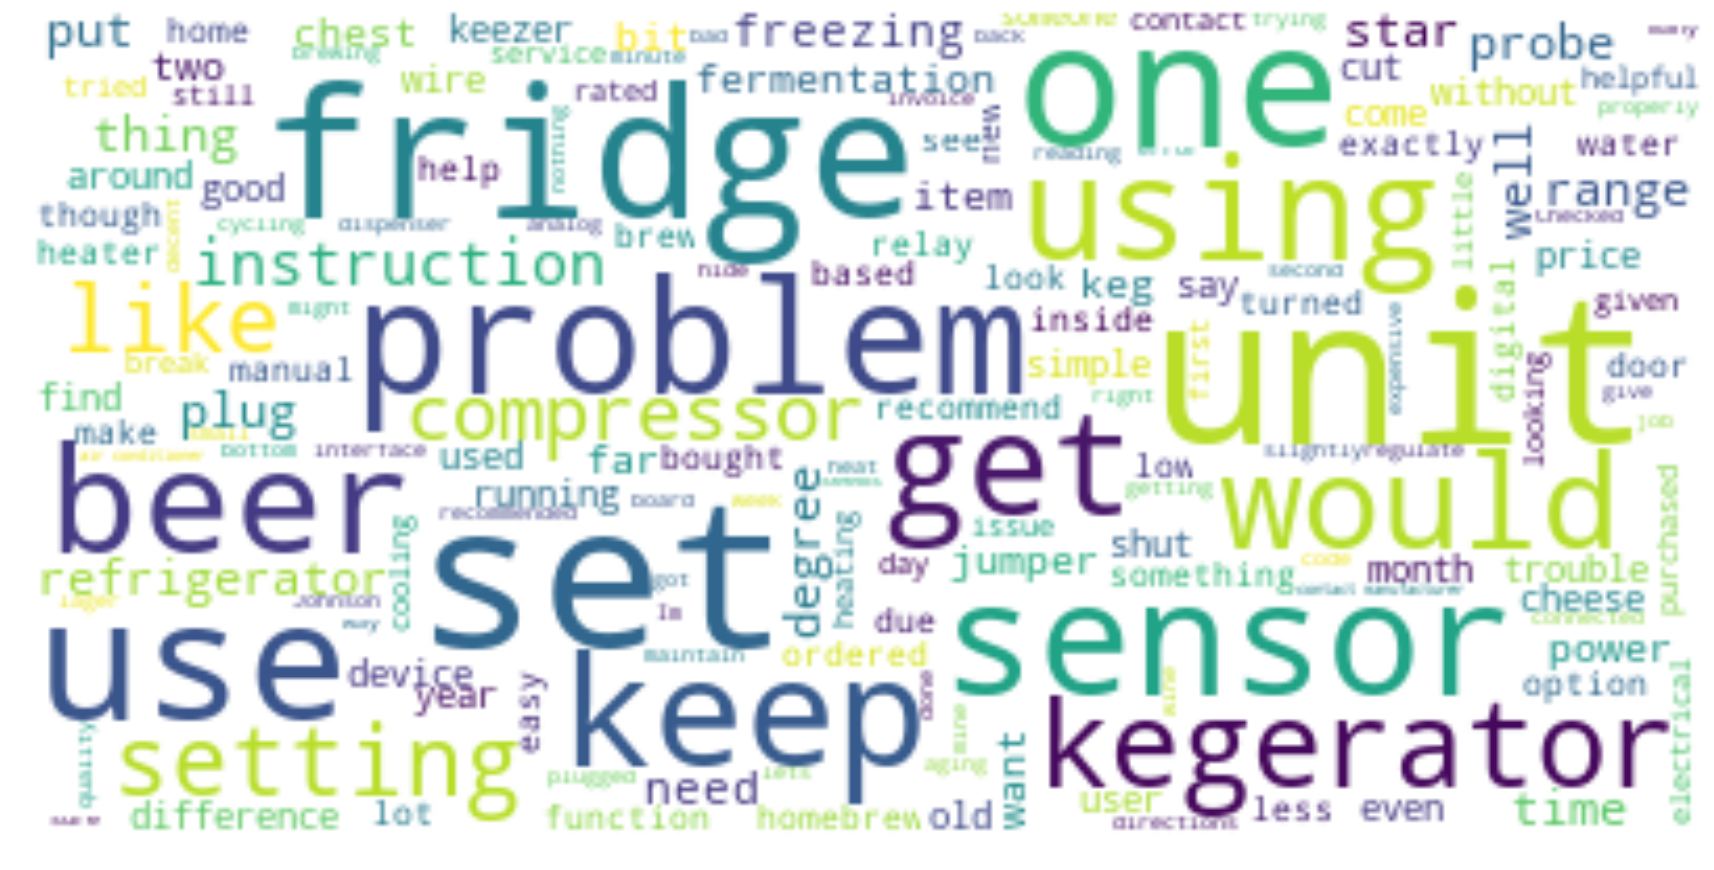

In [83]:
# Generate a word cloud image exclusing stop words
stop_words.update(["freezer","work","control","product","work","working","works"])
wordcloud = WordCloud(stopwords=stop_words,max_font_size=50,background_color="white").generate(NegativeReviewText)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(30,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("C:/Users/jkadhak/Python Scripts/NegativeWordCloud.png")

Inferences: 
1. Form the above word cloud we see the words like instruction, Manual, ordered, purchased, user direction,contact,service.Meaning there can be some complains about user manual/instruction with the controller or there can be some issues with purchasing cycle or customer care service. Business can now further look into these for process improvements.
2. Also we see some words like settings, Shut, plug, probe,Power option, interface. These can point to some unsatisfactory customer with the design or parts of the thermostat.

Business now has some improvement areas to look into further.